## Category Data Type

This script was created follwing the walkthrough in Kyrill Eremenko's Python A-Z: Python for Data Science course on Udemy.com.

In [71]:
import pandas as pd
import os

In [72]:
os.getcwd()

'C:\\Users\\Eszter\\Anaconda3\\__notebooks'

In [73]:
movies = pd.read_csv('Movie-Ratings.csv')

In [74]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [75]:
len(movies)

559

Rename columns

In [76]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [77]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [78]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


Do we really want to handle Year as an integer? Are those data types correct?

In [79]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [80]:
movies.Film = movies.Film.astype('category')

In [81]:
movies.Genre = movies.Genre.astype('category')

In [82]:
movies.Year = movies.Year.astype('category')

In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [84]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
import warnings
warnings.filterwarnings('ignore')

# Visualizations

## Jointplot

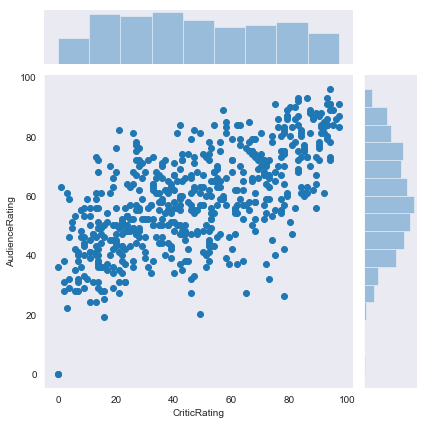

In [86]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

Insights:
1. Audience rating is above critics rating in case of lowly rated movies but gets closer as the rating improves. Audience might be more forgiving than professionals. 
2. Audience rating follows a normal distribution, while critics rating is rather evenly distributed.

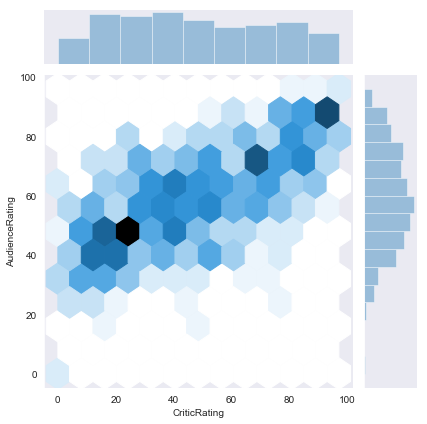

In [87]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

Hex function provides us with clusters. 

## Histograms

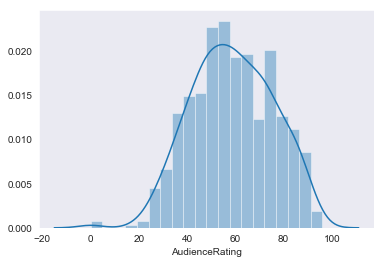

In [88]:
m1 = sns.distplot(movies.AudienceRating, bins =20)

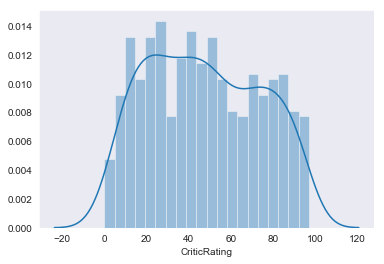

In [89]:
m2 = sns.distplot(movies.CriticRating, bins =20)

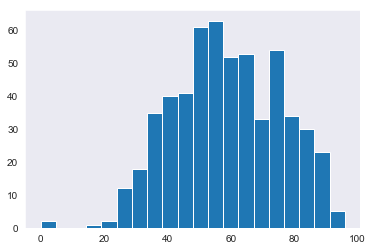

In [90]:
n1 = plt.hist(movies.AudienceRating, bins =20)

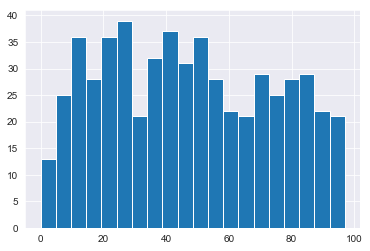

In [91]:
sns.set_style('darkgrid')
n1 = plt.hist(movies.CriticRating, bins =20)

On these histogram we can better observe how differetn audience and critics behave.

## Stacked Histograms

First we create filters.

In [92]:
movies.Genre == 'Drama'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11      True
12     False
13      True
14     False
15     False
16     False
17     False
18      True
19     False
20     False
21     False
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29     False
       ...  
529     True
530    False
531    False
532     True
533    False
534     True
535    False
536    False
537    False
538    False
539    False
540    False
541     True
542    False
543    False
544    False
545     True
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
Name: Genre, Length: 559, dtype: bool

Then we select the filtered data.

In [93]:
movies[movies.Genre == 'Drama'].BudgetMillions

10      30
11      20
13       7
18       8
23      20
26       8
27      30
47      13
53      26
55       2
56      55
62      55
74      15
84      25
96      37
99      25
112     60
116     21
117      5
119     31
120     40
128      1
131     24
132     21
151     33
158     16
171      7
195     15
199     35
213     10
      ... 
437     13
442     20
444      2
445     20
446     40
450     65
457     40
466     45
467     11
470     60
480     39
482     32
483     68
484     50
487      0
488      4
489    150
490     16
492     25
508     20
509     10
511      2
516     25
523     26
527     70
529     66
532     38
534     21
541     15
545      2
Name: BudgetMillions, Length: 101, dtype: int64

We can visualize this partial sets of data.

In [94]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

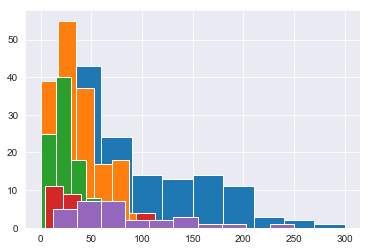

In [95]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Comedy'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Adventure'].BudgetMillions)
plt.show()

Thus we got a huge mass, so we should organize it a bit more. We want to stack them, not hide them behind each other. We need to create a list from these sets.

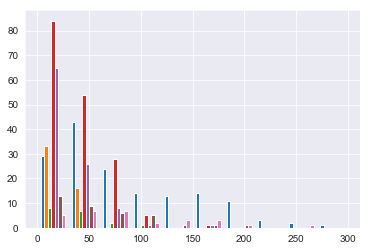

In [96]:
list = [movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Horror'].BudgetMillions, movies[movies.Genre == 'Romance'].BudgetMillions, movies[movies.Genre == 'Comedy'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions, movies[movies.Genre == 'Adventure'].BudgetMillions]
plt.hist(list)
plt.show()

Now we've got them side by side. But we need them to be stacked.

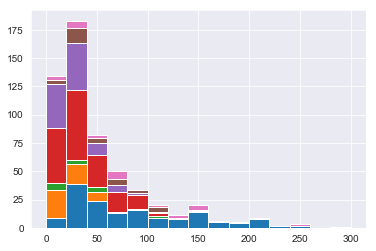

In [97]:
plt.hist(list, bins = 15, stacked = True)
plt.show()

What if we have much more genre? We might not want to do all this manually. That is what we can use a loop for.

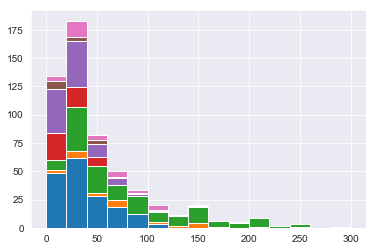

In [98]:
list1 = []
for gen in movies.Genre.unique():
    list1.append(movies[movies.Genre == gen].BudgetMillions)

plt.hist(list1, bins = 15, stacked = True)
plt.show()

Adding legend

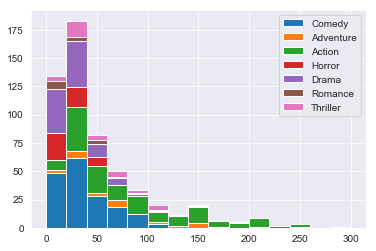

In [99]:
list1 = []
labels = []
for gen in movies.Genre.unique():
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen)

plt.hist(list1, bins = 15, stacked = True, label = labels)
plt.legend()
plt.show()

## Improving this chart

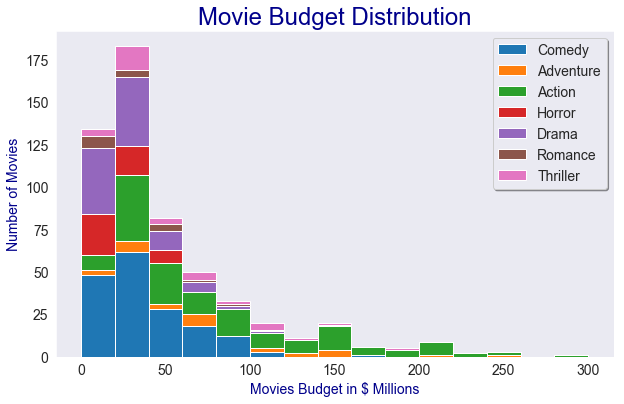

In [183]:
list1 = []
labels = []
for gen in movies.Genre.unique():
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen)

sns.set_style("dark") #backround should look nicer
fig, ax=plt.subplots() #by creating a subplot we can better control figure size
fig.set_size_inches(10,6)

plt.hist(list1, bins = 15, stacked = True, label = labels)

plt.title('Movie Budget Distribution', fontsize = 24, color = 'Darkblue', fontname ='Arial') #adding title to chart
plt.ylabel('Number of Movies', fontsize = 14, color = 'darkblue') #adding labels for the axes
plt.xlabel('Movies Budget in $ Millions', fontsize=14, color = 'darkblue')
plt.legend(prop={'size':14}, frameon=True, fancybox=True, shadow=True)
plt.yticks(fontsize=14) #changing tick stlye of the axes
plt.xticks(fontsize=14) #increasing size, adding background

plt.show()

## KDE plot

Let's see a scatterplot we have already tried. 

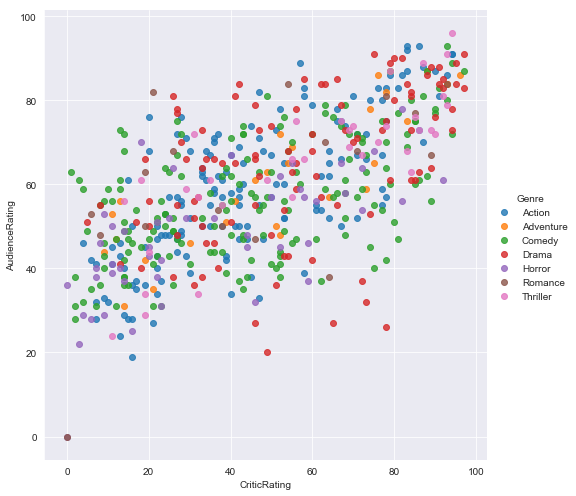

In [100]:
s1 = sns.lmplot(data= movies, x= 'CriticRating', y='AudienceRating', fit_reg= False, hue = 'Genre', size = 7, aspect = 1)

It is pretty massy, we cannot really see anything. The heatmap-like kernel density estimate (KDE) chart might give a better insight. 

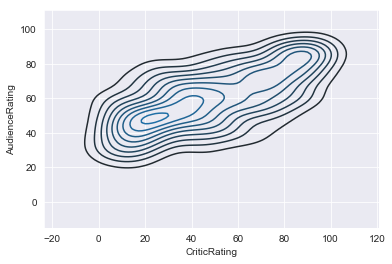

In [101]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

We can make it more like a heatmap by shading it, and we can also change the colour to red.

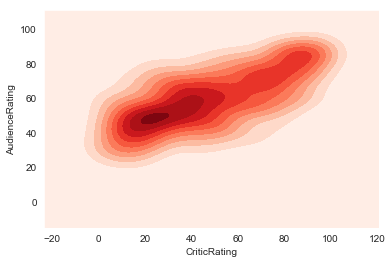

In [102]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, cmap = "Reds")

## Working with subplots

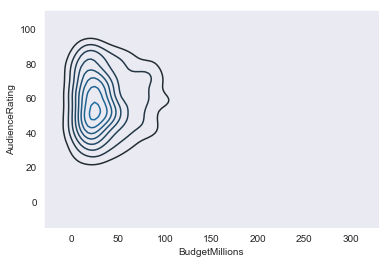

In [103]:
sns.set_style('dark') #getting rid of the gridlines 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

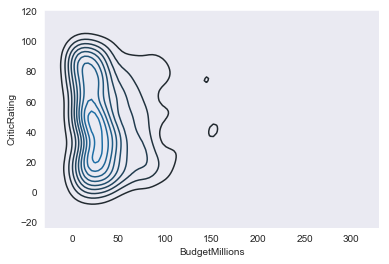

In [104]:
sns.set_style('dark') 
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

We can place the two charts side by side by splitting the chart area. 

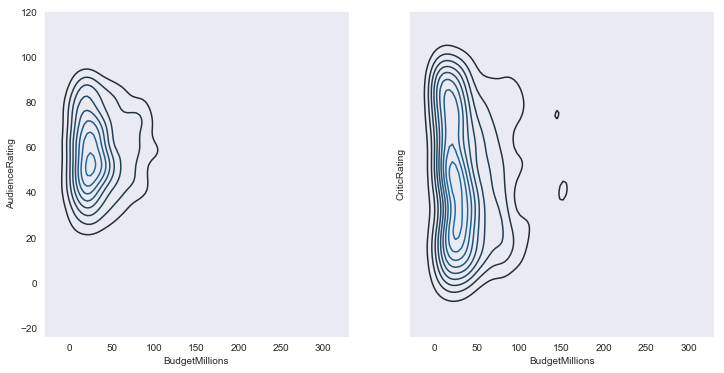

In [105]:
f, axes = plt.subplots(1,2, figsize =(12,6), sharex = True, sharey = True) #one row, two columns, size fo 12 long, 6 high
#sharex / sharey makes the two x and y axes the same
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0]) #ax: where to put the chart
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])

## Violinplots vs Boxplots

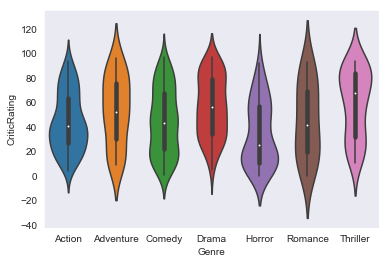

In [106]:
vp = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')
#violinplot shows concentration of points

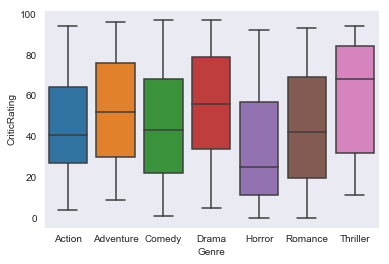

In [185]:
bp = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')
#boxplot provides statistical observation (median, quartiles)

## Creating a Facet Grid

A facet grid is a set of empty chart areas organized in rows and columns as given in its function. Unlike subplots, the grid will be populated automatically.

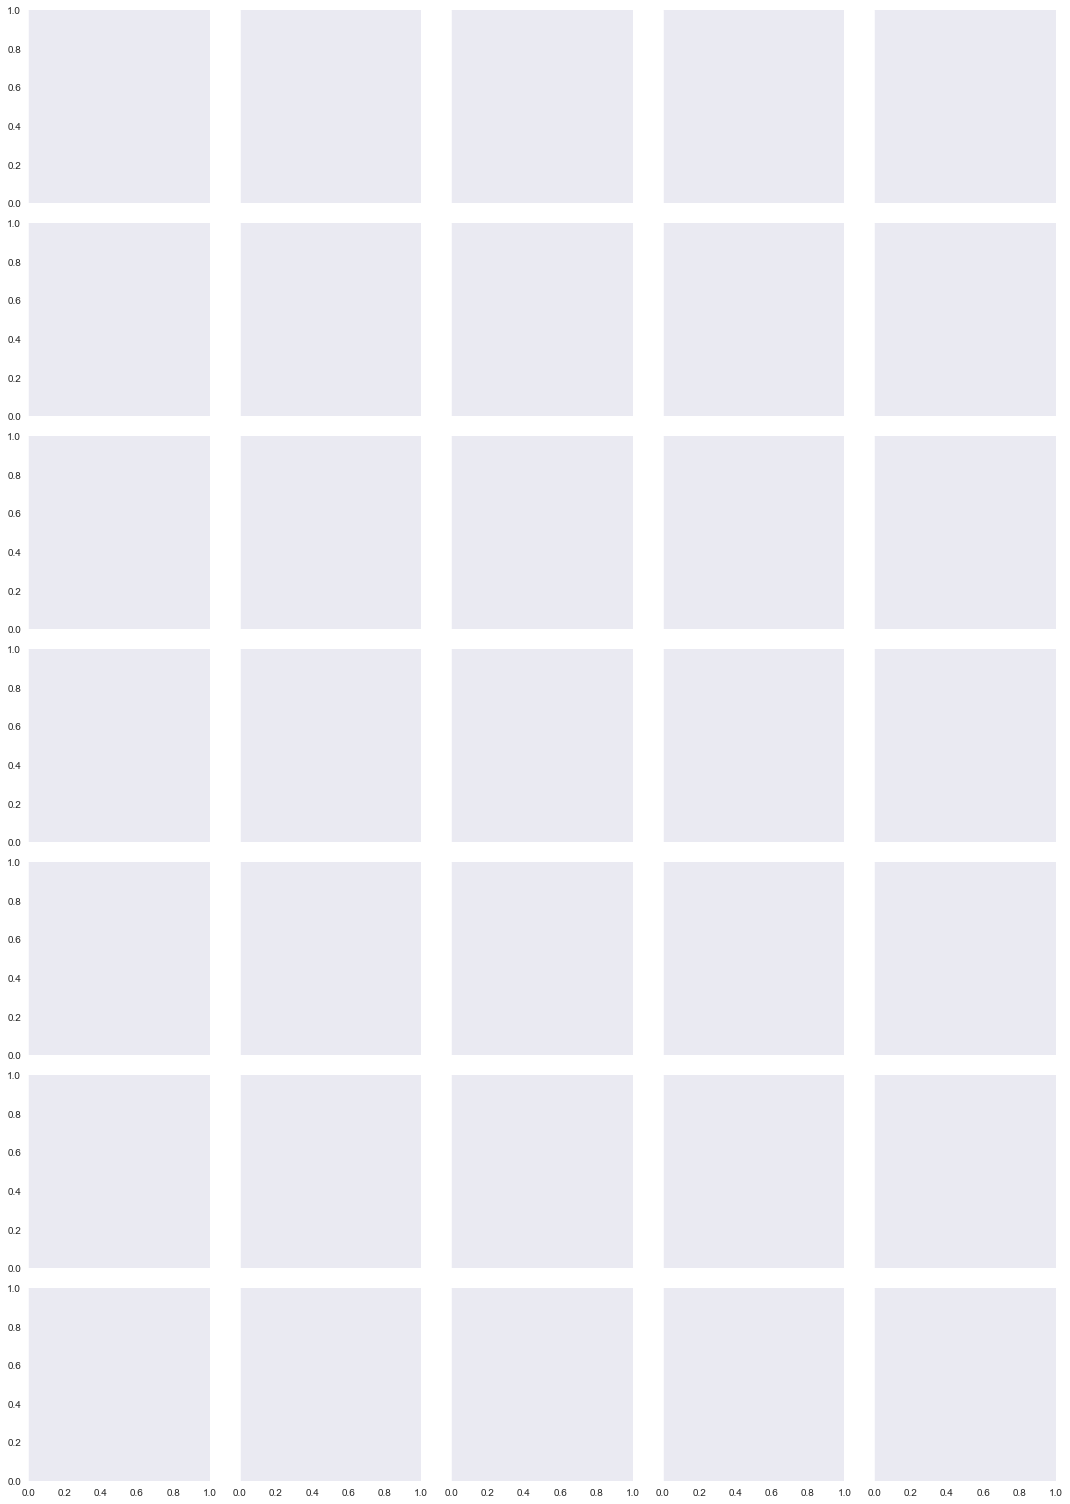

In [108]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

In order to populate facet grid spreading our scatterplots all over it, we call in the map function.

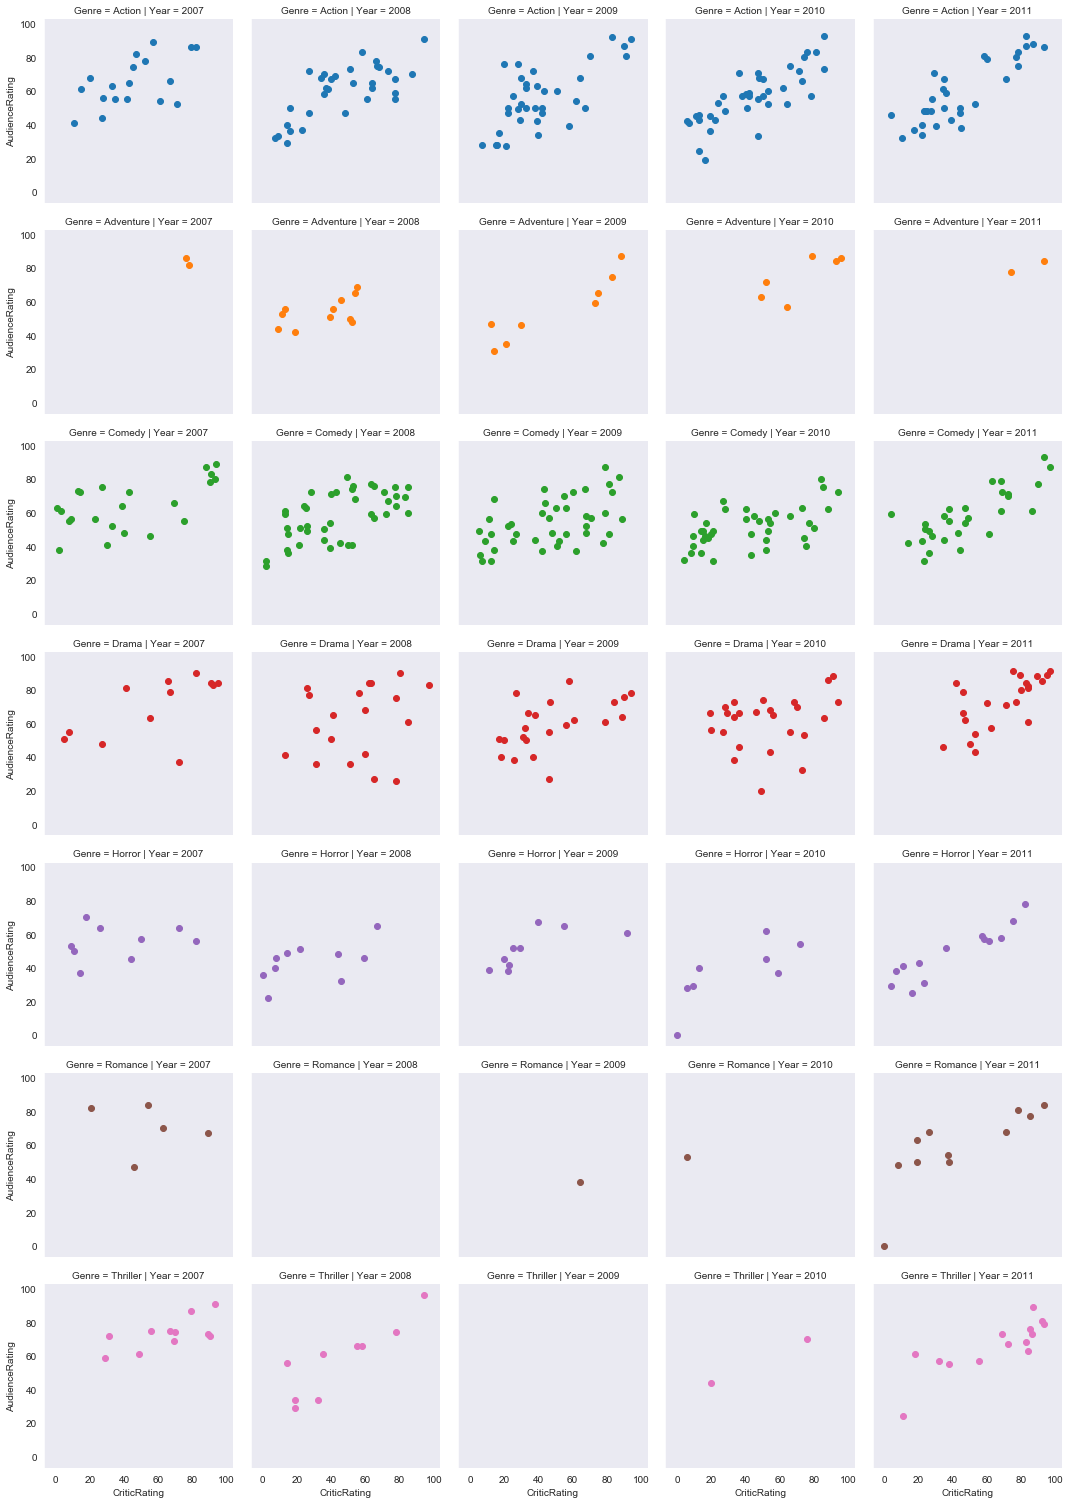

In [109]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

Facet grid can be populated with any type of chart.

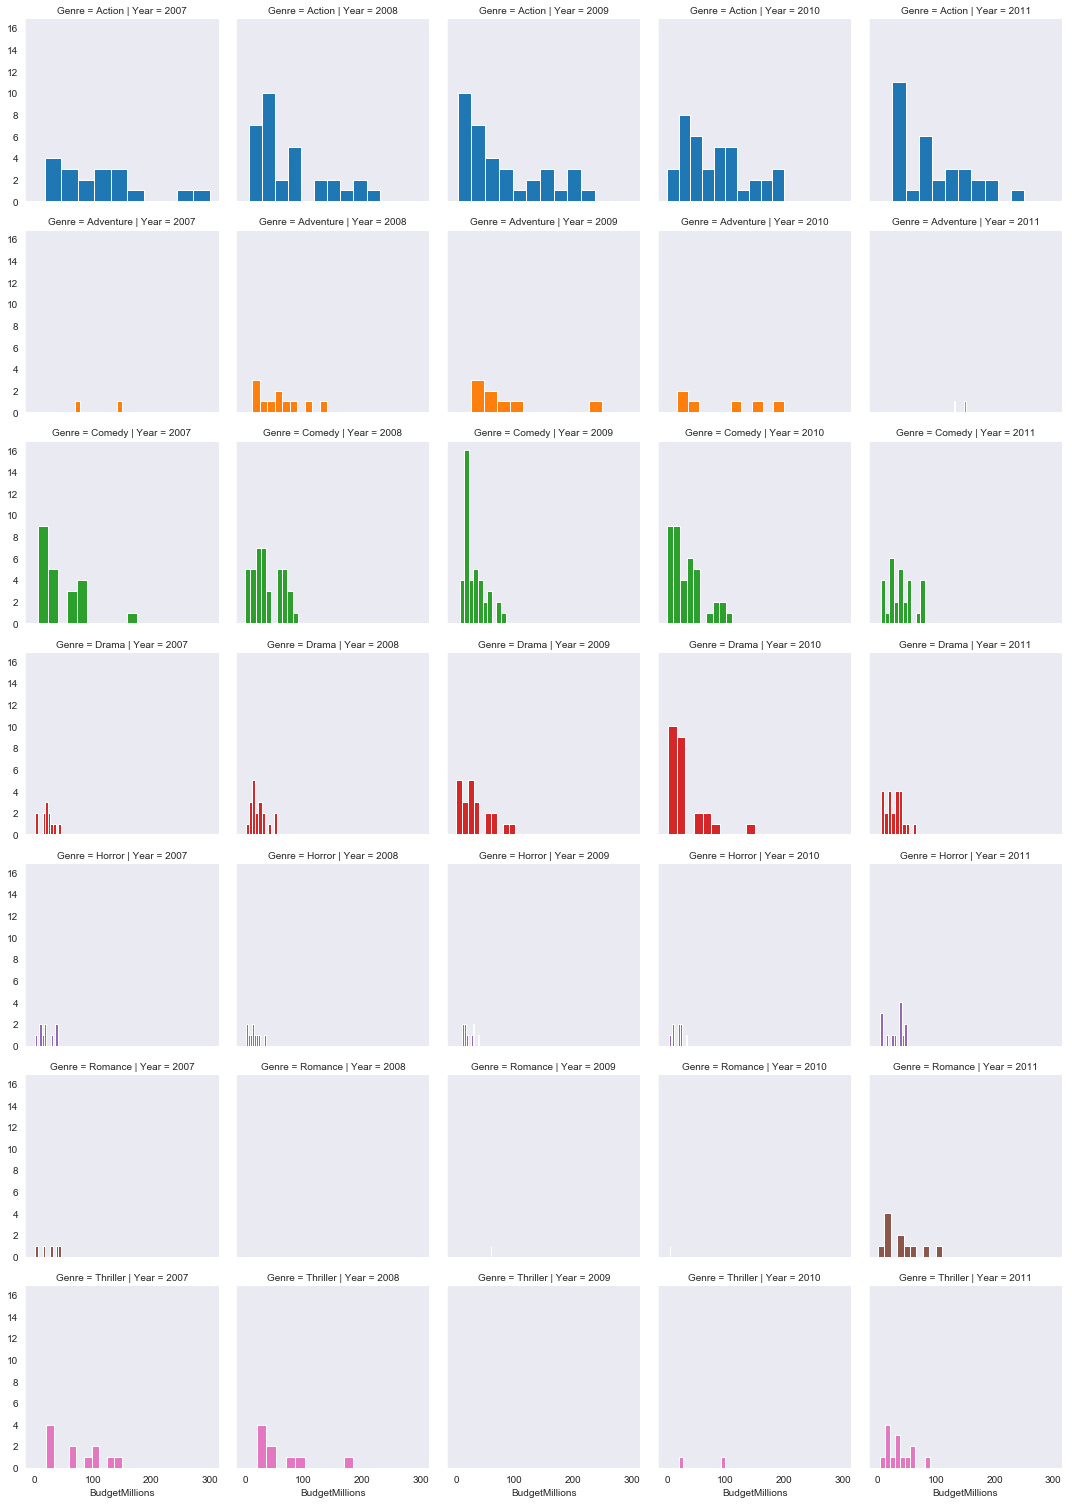

In [110]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions')

Let's practice some keyword arguments on our original facet grid.

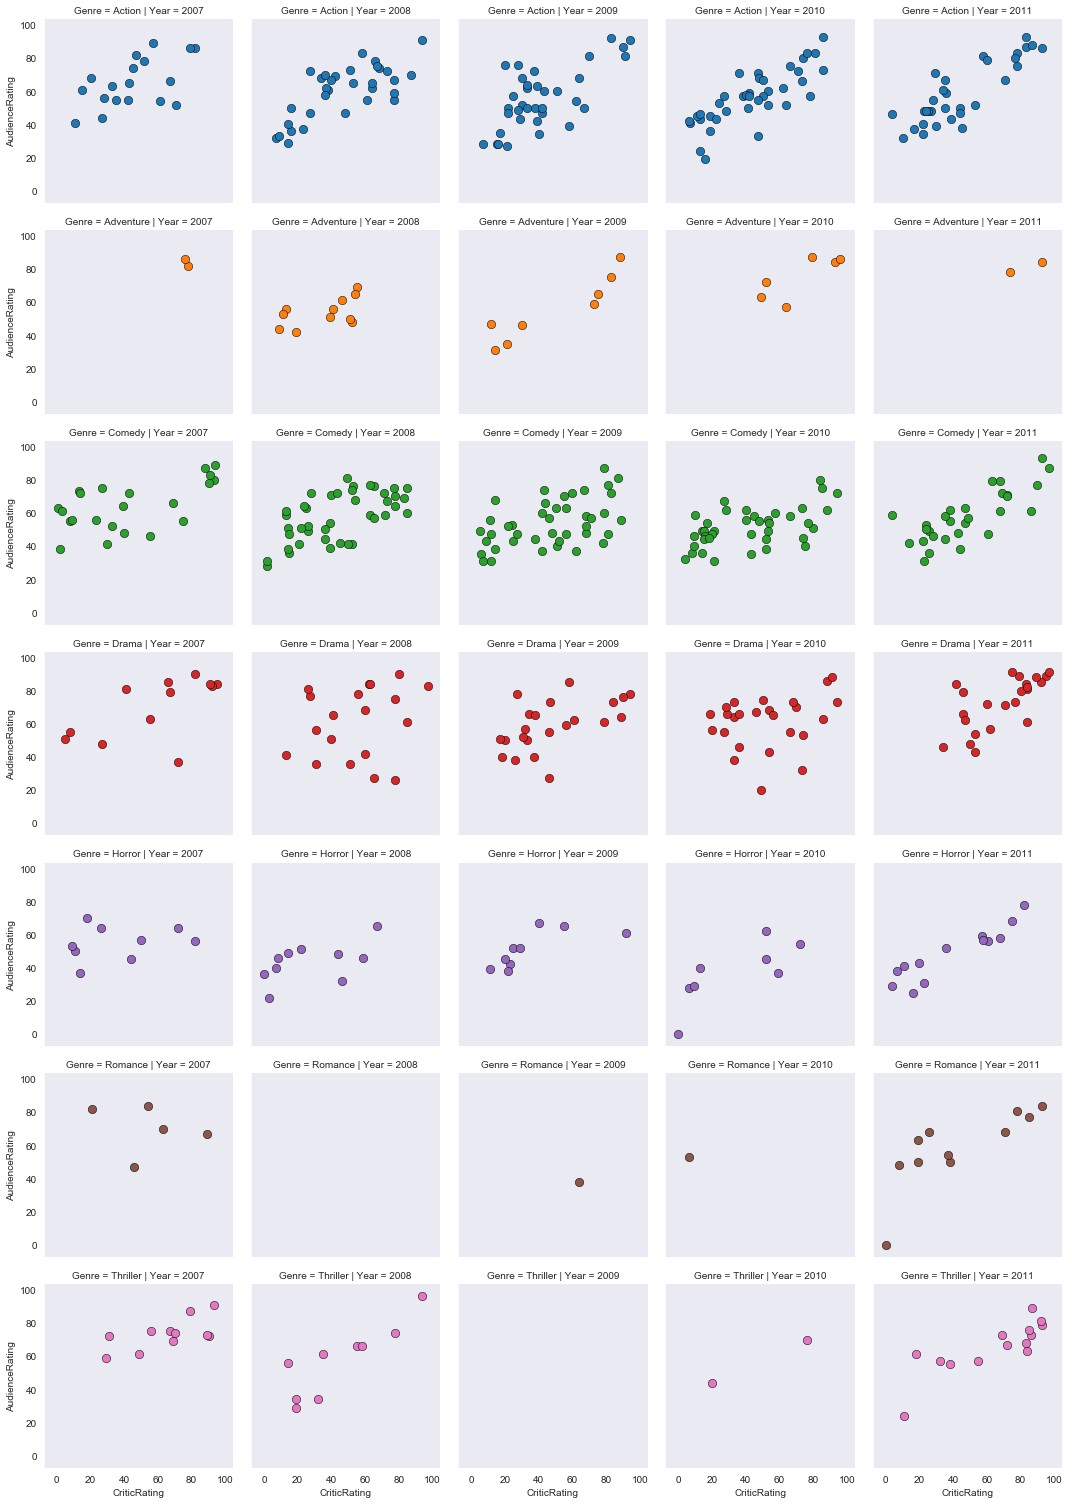

In [111]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=70, linewidth=0.5, edgecolor='Black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

## Coordinates and Diagonals

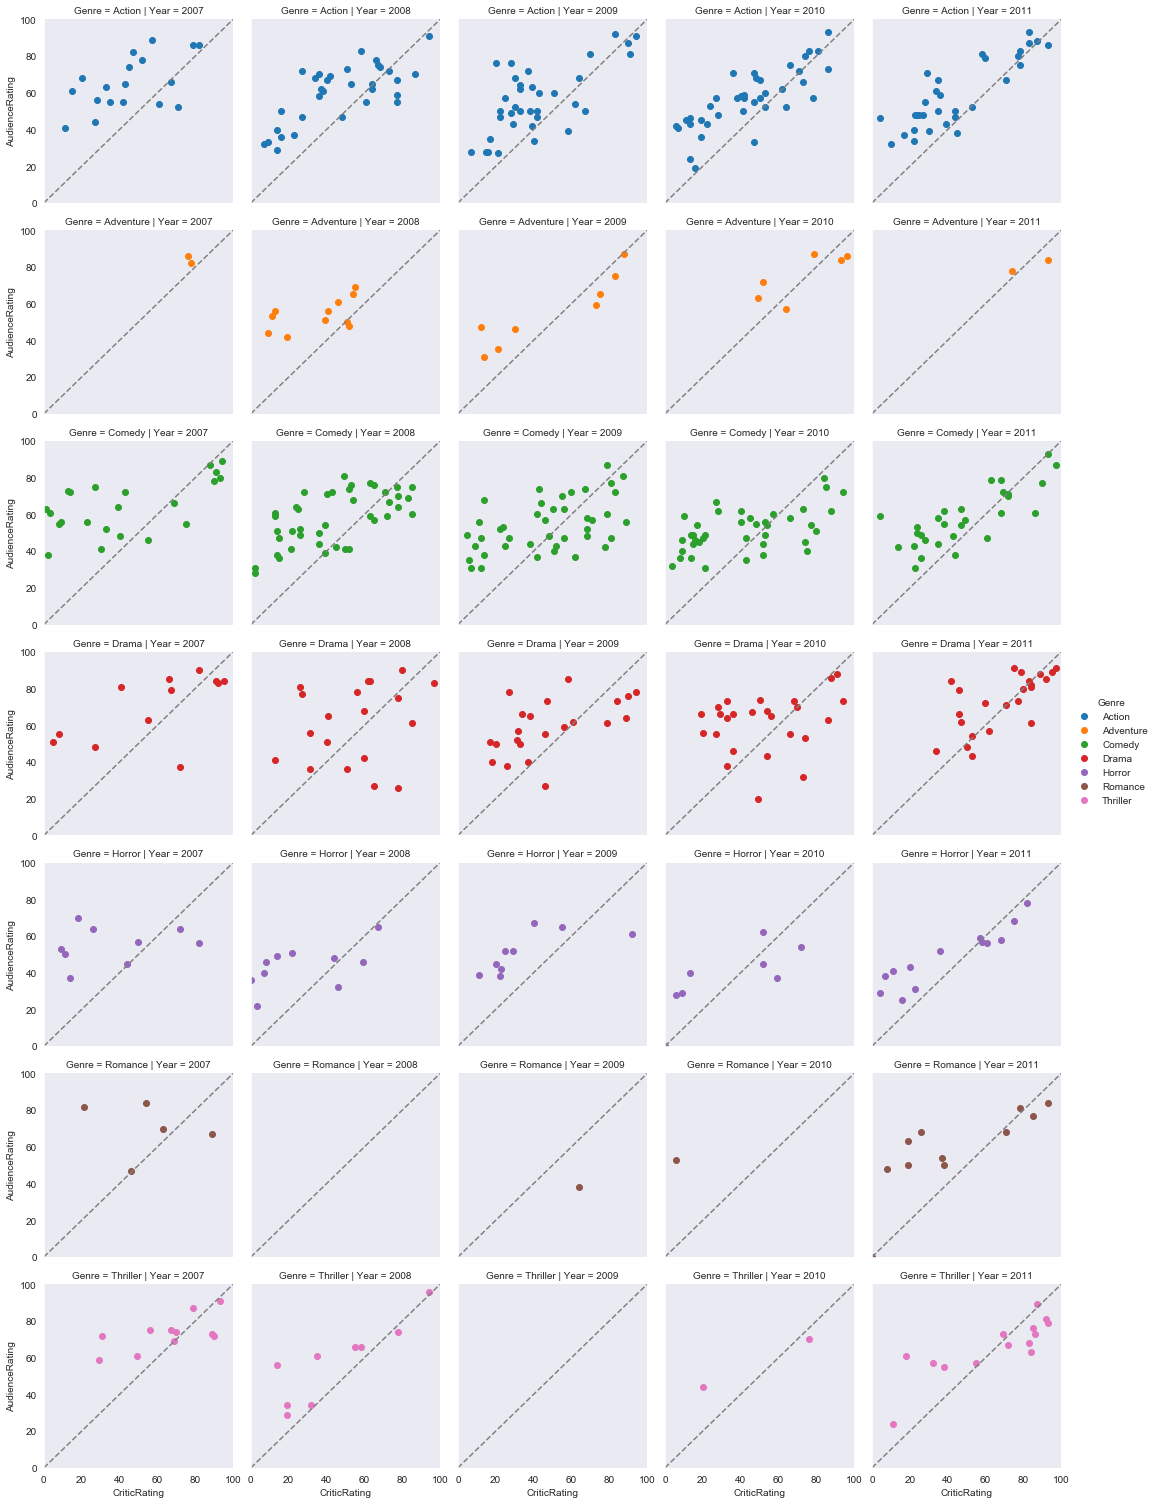

In [186]:
#Controlling axes and adding diagonals
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=70, linewidth=0.5, edgecolor='Black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')
g.set(xlim=(0,100), ylim=(0,100)) #fixing coordinates
#diagonal needs a loop
for ax in g.axes.flat: #axes is an array with the elements of the subplots for the grid. flat is an iterator.
    ax.plot((0,100), (0,100), c='grey', ls='--')
g.add_legend()
plt.show()

## Building Dashboards in Python

We use the subplot function.

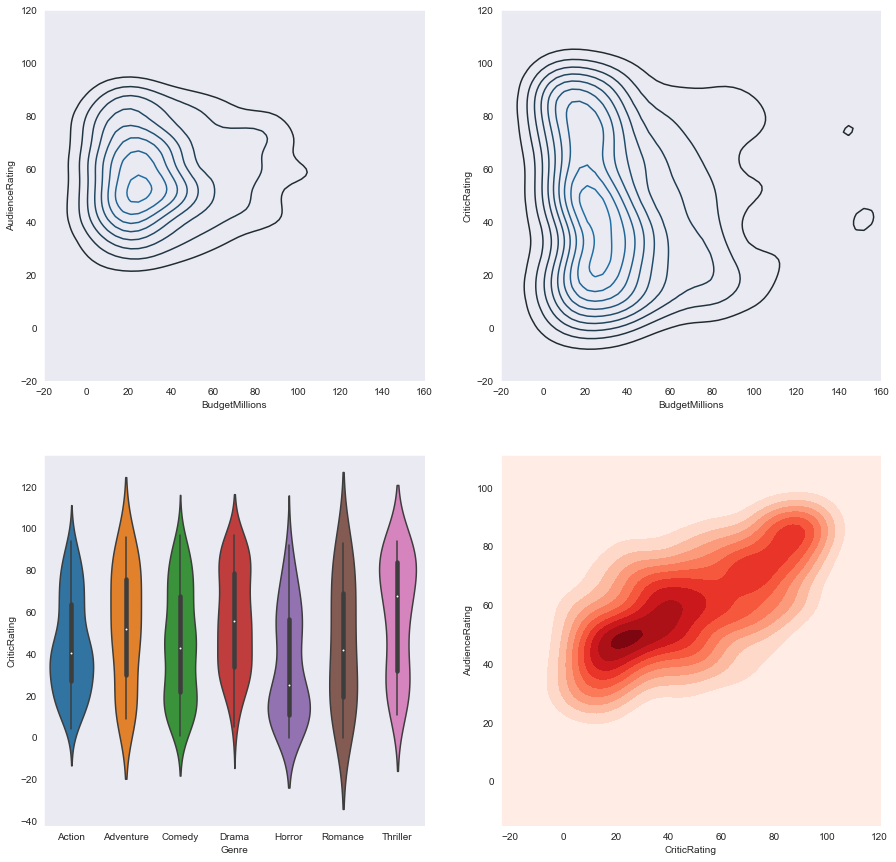

In [122]:
f, axes = plt.subplots(2,2, figsize =(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0])
k1.set(xlim=(-20,160), ylim=(-20,120))
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1])
k2.set(xlim=(-20,160), ylim=(-20,120))
vp = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating', ax = axes[1,0])
kd1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, cmap = "Reds", ax = axes[1,1])    
plt.show()

This script works only in case all charts are seaborn plots. In case non-seaborn charts we should replace are seaborn function with something like this:

axes[1,1].hist(list1, bins = 15, stacked = True)

## Styling the Dashboard

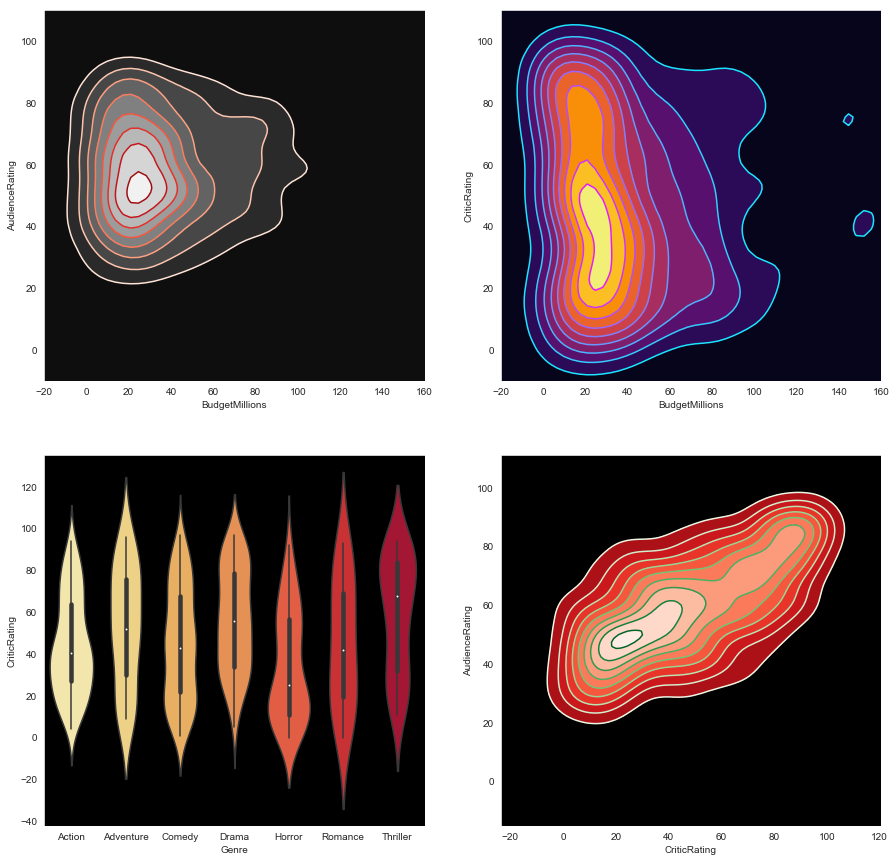

In [152]:
sns.set_style("dark", {'axes.facecolor':'black'})
f, axes = plt.subplots(2,2, figsize =(15,15))

#Plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0], shade = True, shade_lowest=True, cmap = 'gist_gray')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0], shade_lowest='True', cmap = 'Reds')
k1.set(xlim=(-20,160), ylim=(-10,110))

#Plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1], shade = True, shade_lowest=True, cmap = 'inferno')
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1], shade_lowest=True, cmap = 'cool')
k2.set(xlim=(-20,160), ylim=(-10,110))

#Plot[1,0]
vp = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating', ax = axes[1,0], palette = 'YlOrRd')

#Plot[1,1]
kd1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap = "Reds_r", ax = axes[1,1])    
kd1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "Greens", ax = axes[1,1])

plt.show()